<a href="https://colab.research.google.com/github/luongduong147/Predict-the-crypto-price-with-LSTM/blob/main/Lu%E1%BA%ADn_v%C4%83n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DATA preparing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pandas_datareader
!pip install investpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 17.7 MB/s 
     |████████████████████████████████| 235 kB 49.4 MB/s 
     |████████████████████████████████| 6.4 MB 48.0 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=021ce5318706f7c7be3800599656d0b494339e7b5d1648fa7b0ccf6ea4621779
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
#Data import
import investpy
data = investpy.get_index_historical_data(index='VN 30',
                                        country='VietNam',
                                        from_date='04/05/2016',
                                        to_date='04/05/2019')
data.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2016-05-04,600.63,606.88,597.40,602.57,53001,VND
2016-05-05,603.68,609.59,603.32,604.69,43705,VND
2016-05-06,604.96,610.19,604.70,607.55,38019,VND
2016-05-09,610.78,612.82,604.24,604.24,39065,VND
2016-05-10,601.23,605.37,597.91,604.56,40948,VND


In [ ]:
#Checking Na value
data.isna().sum()

Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [ ]:
#Importing Indicator feature
!curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install && cd - && pip install ta-lib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   380  100   380    0     0   2261      0 --:--:-- --:--:-- --:--:--  2261
100   355  100   355    0     0   1017      0 --:--:-- --:--:-- --:--:--  1017
100 1299k  100 1299k    0     0  1382k      0 --:--:-- --:--:-- --:--:-- 4143k
ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/outpu

In [ ]:
#Plotting OHLC chart
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Ohlc(x=data.index,
                      open=data.Open,
                      high=data.High,
                      low=data.Low,
                      close=data.Close,
                      name='Price'), row=1, col=1)

fig.add_trace(go.Scatter(x=data.index, y=data.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()


In [ ]:
# Time series decomposition
!pip install stldecompose
from stldecompose import decompose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



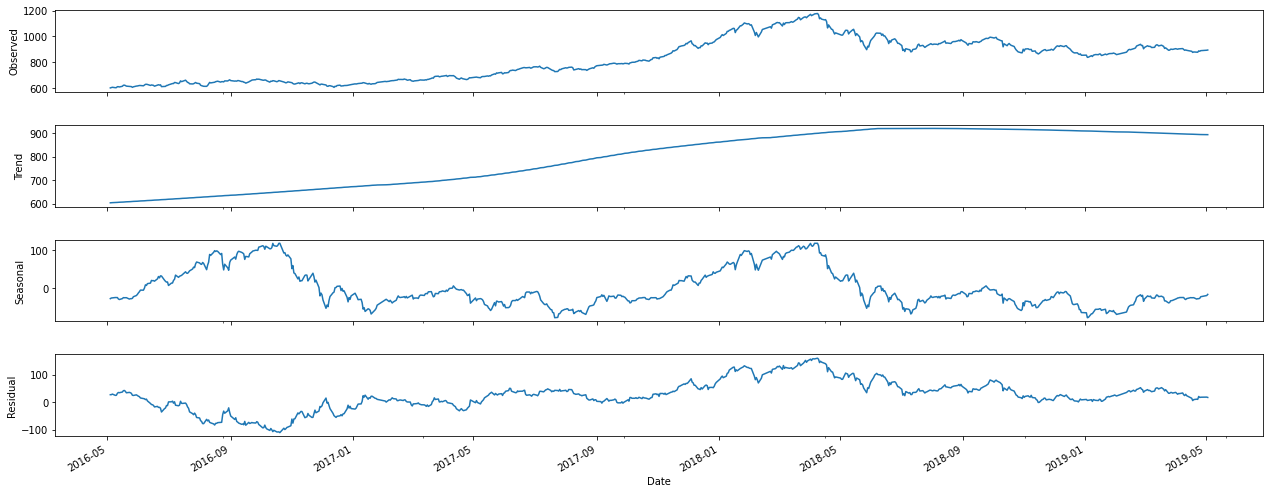

In [ ]:
#time series decompostion
data_close = data['Close'].copy()
data_close.head()

decomp = decompose(data_close, period=365)
fig = decomp.plot()
fig.set_size_inches(20, 8)

In [ ]:
#Making categorical label
def inc_dec(c, o):
    if c > o:
        value="1" #increase
    elif c < o:
        value="-1" #decrease
    else:
        value="0" #equal
    return value

data["Status"]=[inc_dec(c,o) for c, o in zip(data.Close,data.Open)]
data.head()

,Open,High,Low,Close,Volume,Currency,Status
Date,,,,,,,
2016-05-04,600.63,606.88,597.40,602.57,53001,VND,1
2016-05-05,603.68,609.59,603.32,604.69,43705,VND,1
2016-05-06,604.96,610.19,604.70,607.55,38019,VND,1
2016-05-09,610.78,612.82,604.24,604.24,39065,VND,-1
2016-05-10,601.23,605.37,597.91,604.56,40948,VND,1


In [ ]:
#Shifting index
data['Close']=data['Close'].shift(-1)


In [ ]:
#featuring Technical indicators
import talib
#momentum indicators
data['EMA_5'] = talib.EMA(data['Close'], timeperiod=5)
data['EMA_10'] = talib.EMA(data['Close'], timeperiod=10)
data['EMA_34'] = talib.EMA(data['Close'], timeperiod=34)
data['EMA_89'] = talib.EMA(data['Close'], timeperiod=89)
data['SMA_5'] = talib.SMA(data['Close'], timeperiod=5)
data['SMA_10'] = talib.SMA(data['Close'], timeperiod=10)
data['SMA_34'] = talib.SMA(data['Close'], timeperiod=34)
data['SMA_89'] = talib.SMA(data['Close'], timeperiod=89)
data['ADX']=talib.ADX(data['High'],data['Low'],data['Close'],timeperiod=14)
data['RSI']=talib.RSI(data['Close'],timeperiod=14)
#volatility indicators
data['ATR']=talib.ATR(data['High'],data['Low'],data['Close'],timeperiod=14)
#Volume indicators
data['OBV']=talib.OBV(data['Close'],data['Volume'])
data=data.fillna(0)
data.head()

,Open,High,Low,Close,Volume,Currency,Status,EMA_5,EMA_10,EMA_34,EMA_89,SMA_5,SMA_10,SMA_34,SMA_89,ADX,RSI,ATR,OBV
Date,,,,,,,,,,,,,,,,,,,
2016-05-04,600.63,606.88,597.40,604.69,53001,VND,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53001.0
2016-05-05,603.68,609.59,603.32,607.55,43705,VND,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96706.0
2016-05-06,604.96,610.19,604.70,604.24,38019,VND,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58687.0
2016-05-09,610.78,612.82,604.24,604.56,39065,VND,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97752.0
2016-05-10,601.23,605.37,597.91,611.96,40948,VND,1,606.6,0.0,0.0,0.0,606.6,0.0,0.0,0.0,0.0,0.0,0.0,138700.0


In [ ]:
data = data.iloc[33:] # Because of moving averages and MACD line
data = data[:-1]      # Because of shifting close price

data.index = range(len(data))

In [ ]:
#Train test split
test_size  = 0.15
valid_size = 0.15

test_split_idx  = int(data.shape[0] * (1-test_size))
valid_split_idx = int(data.shape[0] * (1-(valid_size+test_size)))

train_df  = data.loc[:valid_split_idx].copy()
valid_df  = data.loc[valid_split_idx+1:test_split_idx].copy()
test_df   = data.loc[test_split_idx+1:].copy()

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index, y=train_df.Close, name='Training'))
fig.add_trace(go.Scatter(x=valid_df.index, y=valid_df.Close, name='Validation'))
fig.add_trace(go.Scatter(x=test_df.index,  y=test_df.Close,  name='Test'))
fig.show()

In [ ]:
#drop unecessary columns
drop_cols = ['Close','Open','High','Low', 'Currency', 'Status']

train_df = train_df.drop(drop_cols, 1)
valid_df = valid_df.drop(drop_cols, 1)
test_df  = test_df.drop(drop_cols, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
#Split into features and labels
y_train = train_df['Close'].copy()
X_train = train_df.drop(['Close'], 1)

y_valid = valid_df['Close'].copy()
X_valid = valid_df.drop(['Close'], 1)

y_test  = test_df['Close'].copy()
X_test  = test_df.drop(['Close'], 1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EMA_5   502 non-null    float64
 1   EMA_10  502 non-null    float64
 2   EMA_34  502 non-null    float64
 3   EMA_89  502 non-null    float64
 4   SMA_5   502 non-null    float64
 5   SMA_10  502 non-null    float64
 6   SMA_34  502 non-null    float64
 7   SMA_89  502 non-null    float64
 8   ADX     502 non-null    float64
 9   RSI     502 non-null    float64
 10  ATR     502 non-null    float64
 11  OBV     502 non-null    float64
dtypes: float64(12)
memory usage: 47.2 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



-6.909156686385472 [ 3.47187875e+00 -6.64071789e-01  2.18216060e-01  1.50985352e-01
 -1.60606927e+00 -3.62757374e-01 -5.80849829e-02 -1.50044760e-01
 -2.62504545e-02  1.27404402e-01  2.13066576e-01 -2.58311448e-07] 0.9996277305291047
1.9096004483266513 2.567436831223758 0.9899527842626896


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



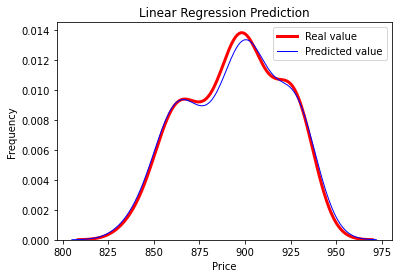

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)
print(linear.intercept_, linear.coef_, linear.score(X_train, y_train))
linear_pred=linear.predict(X_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(y_test,linear_pred)
rmse=np.sqrt(mean_squared_error(y_test,linear_pred))
r2=r2_score(y_test,linear_pred)
print(mae,rmse,r2)
linear_pred=pd.DataFrame(linear_pred)
linear_pred.fillna(method='ffill')

#Distribution
sns.distplot(y_test, color = 'red', label = 'Real value',kde=True, hist=False,kde_kws={'linewidth':3})
sns.distplot(linear_pred, color = 'blue', label = 'Predicted value',kde=True, hist=False,kde_kws={'linewidth':1})
plt.title('Linear Regression Prediction')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()
#Price chart


-8.626316019518981 [ 3.36306485e+00 -6.46465487e-01  2.15303907e-01  1.28982892e-01
 -1.48903231e+00 -3.81679943e-01 -5.49780129e-02 -1.29254141e-01
  5.56687506e-03  7.67392820e-02  1.20863128e-01 -5.17071251e-07
  1.85600605e+00] 0.9996701159620167
1.5350127801911744 1.9300164798803068 0.9948438838283057


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



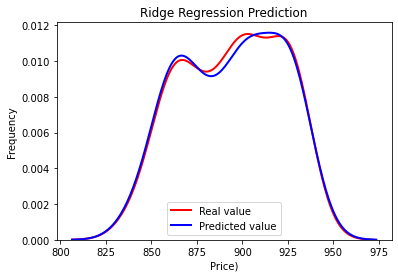

In [ ]:
#RIDGE regression
from sklearn.linear_model import Ridge
Ridge_model=Ridge(alpha=2,fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)
Ridge_model.fit(X_train,y_train)
print(linear.intercept_, linear.coef_, linear.score(X_train, y_train))
r_pred=Ridge_model.predict(X_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
ridge_mae=mean_absolute_error(y_test,r_pred)
ridge_rmse=np.sqrt(mean_squared_error(y_test,r_pred))
ridge_r2=r2_score(y_test,r_pred)
print(ridge_mae,ridge_rmse,ridge_r2)
sns.distplot(y_test, color = 'red', label = 'Real value',kde=True, hist=False,kde_kws={'linewidth':2})
sns.distplot(r_pred, color = 'blue', label = 'Predicted value',kde=True, hist=False,kde_kws={'linewidth':2})
plt.title('Ridge Regression Prediction')
plt.xlabel('Price)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Random Forest Regressor


In [ ]:
#Randomforest Regressor
#Tuning Param
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [8, 10, 12, 15],
    'random_state': [42]
}
eval_set_forest = [(X_train, y_train), (X_valid, y_valid)]
my_forest = RandomForestRegressor(eval_set_forest, verbose=False)
clf = GridSearchCV(my_forest, parameters)

clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

Best params: {'max_depth': 15, 'n_estimators': 300, 'random_state': 42}
Best validation score = 0.3263301805792123


In [ ]:
#Modeling
my_forest = RandomForestRegressor(**clf.best_params_)
my_forest.fit(X_train, y_train)
forest_pred = my_forest.predict(X_test)
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {forest_pred[:5]}')
fr_mae=mean_absolute_error(y_test,forest_pred)
fr_rmse=np.sqrt(mean_squared_error(y_test,forest_pred))
fr_r2=r2_score(y_test,forest_pred)
print(fr_mae,fr_rmse,fr_r2)

y_true = [894.79 921.72 927.46 925.68 922.86]
y_pred = [897.8129 907.757  914.0752 914.9108 915.0793]
12.26912577319583 15.579077203273949 0.6640426722814258


In [ ]:
xgb.plot_importance(model_x);

[Text(0.5, 0.9, 'X[5] <= 841.633\nsquared_error = 28671.162\nsamples = 281\nvalue = 824.346'),
 Text(0.25, 0.7, 'X[5] <= 698.758\nsquared_error = 4052.989\nsamples = 171\nvalue = 698.807'),
 Text(0.125, 0.5, 'X[11] <= 8301.0\nsquared_error = 523.477\nsamples = 103\nvalue = 651.121'),
 Text(0.0625, 0.3, 'X[11] <= -262392.5\nsquared_error = 122.927\nsamples = 52\nvalue = 631.968'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'X[0] <= 675.066\nsquared_error = 207.198\nsamples = 51\nvalue = 669.807'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'X[7] <= 736.869\nsquared_error = 970.171\nsamples = 68\nvalue = 769.035'),
 Text(0.3125, 0.3, 'X[0] <= 738.735\nsquared_error = 188.076\nsamples = 40\nvalue = 747.373'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'X[8] <= 34.29\nsquared_error = 383.808\nsamples = 28\nvalue = 801.526'),
 Text(0.4062

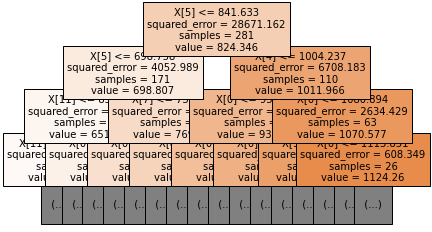

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
tree.plot_tree(my_forest.estimators_[0],max_depth=3, filled=True,fontsize=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



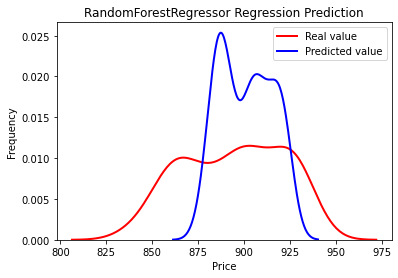

In [ ]:
#Visualize
#KDE
sns.distplot(y_test, color = 'red', label = 'Real value',kde=True, hist=False,kde_kws={'linewidth':2})
sns.distplot(forest_pred, color = 'blue', label = 'Predicted value',kde=True, hist=False,kde_kws={'linewidth':2})
plt.title('RandomForestRegressor Regression Prediction')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()
#Chart
predicted_prices = data.loc[test_split_idx+1:].copy()
predicted_prices['Close'] = forest_pred

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=data.index, y=data.Close,
                         name='Truth',
                         marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.index,
                         y=predicted_prices.Close,
                         name='Prediction',
                         marker_color='MediumPurple'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.index,
                         y=y_test,
                         name='Truth',
                         marker_color='LightSkyBlue',
                         showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.index,
                         y=forest_pred,
                         name='Prediction',
                         marker_color='MediumPurple',
                         showlegend=False), row=2, col=1)

fig.show()

XGB Regressor

In [ ]:
#Tuning Param
import xgboost as xgb
from xgboost import XGBRegressor
parameters = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15,20],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

eval_set = [(X_train, y_train), (X_valid, y_valid)]
model_x = XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False)
clf = GridSearchCV(model_x, parameters)

clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

Best params: {'gamma': 0.001, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 200, 'random_state': 42}
Best validation score = 0.7081050012097092


In [ ]:
#modeling

model_x = XGBRegressor(**clf.best_params_, objective='reg:squarederror')
model_x.fit(X_train, y_train, eval_set=eval_set, verbose=False)
xgb_pred = model_x.predict(X_test)
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {xgb_pred[:5]}')
xgb_mae=mean_absolute_error(y_test,xgb_pred)
xgb_rmse=np.sqrt(mean_squared_error(y_test,xgb_pred))
xgb_r2=r2_score(y_test,xgb_pred)
print(xgb_mae,xgb_rmse,xgb_r2)

y_true = [897.1  898.9  890.62 895.05 895.3 ]
y_pred = [909.19324 917.22437 916.7058  917.02954 915.728  ]
10.149261622919099 11.713121041824616 0.7908819810663182


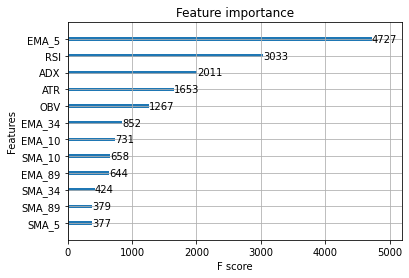

In [ ]:
xgb.plot_importance(model_x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



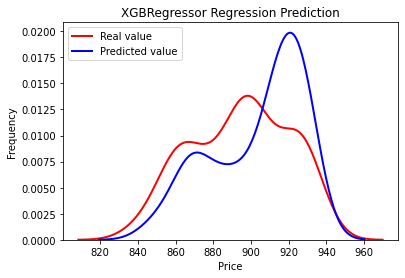

In [ ]:
#visualize
#KDE
sns.distplot(y_test, color = 'red', label = 'Real value',kde=True, hist=False,kde_kws={'linewidth':2})
sns.distplot(xgb_pred, color = 'blue', label = 'Predicted value',kde=True, hist=False,kde_kws={'linewidth':2})
plt.title('XGBRegressor Regression Prediction')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()
#Chart
predicted_prices_x = data.loc[test_split_idx+1:].copy()
predicted_prices_x['Close'] = xgb_pred

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=data.index, y=data.Close,
                         name='Truth',
                         marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices_x.index,
                         y=predicted_prices_x.Close,
                         name='Prediction',
                         marker_color='Green'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices_x.index,
                         y=y_test,
                         name='Truth',
                         marker_color='LightSkyBlue',
                         showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=predicted_prices_x.index,
                         y=xgb_pred,
                         name='Prediction',
                         marker_color='Green',
                         showlegend=False), row=2, col=1)

fig.show()


In [ ]:
!pip install 'neptune-contrib[monitoring]>=0.24.9'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 74 kB 2.3 MB/s 
     |████████████████████████████████| 317 kB 33.7 MB/s 
     |████████████████████████████████| 100 kB 10.0 MB/s 
     |████████████████████████████████| 106 kB 16.3 MB/s 
     |████████████████████████████████| 133 kB 10.2 MB/s 
     |████████████████████████████████| 175 kB 45.3 MB/s 
     |████████████████████████████████| 585 kB 34.4 MB/s 
     |████████████████████████████████| 925 kB 37.7 MB/s 
     |████████████████████████████████| 829 kB 48.4 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 181 kB 72.4 MB/s 
     |████████████████████████████████| 132 kB 57.8 MB/s 
     |████████████████████████████████| 79 kB 10.8 MB/s 
     |████████████████████████████████| 8.8 MB 61.3 MB/s 
     |████████████████████████████████| 138 kB 61.1 MB/s 
     |██████████████████████████████

In [ ]:
import pickle
with open('model_x', 'wb') as files:
    pickle.dump(model_x, files)


In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


BACKTESTING TRADING STRAT

In [ ]:
!pip install backtesting
import pandas as pd
import backtesting
def SMA(array, n):
    """Simple moving average"""
    return pd.Series(array).rolling(n).mean()

def RSI(array, n):
    """Relative strength index"""
    # Approximate; good enough
    gain = pd.Series(array).diff()
    loss = gain.copy()
    gain[gain < 0] = 0
    loss[loss > 0] = 0
    rs = gain.ewm(n).mean() / loss.abs().ewm(n).mean()
    return 100 - 100 / (1 + rs)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 17.0 MB/s 
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173822 sha256=224027ed2c529ba86fb8f4c579dcbfedbdd8f4561e9e4345fd6e2112c2288b7f
  Stored in directory: /root/.cache/pip/wheels/48/1d/ea/65dacebc37da7655d8a1fd0f315ac39d102e31d6545237a1c6
Successfully built backtesting


/usr/local/lib/python3.7/dist-packages/backtesting/_plotting.py:50: UserWarning:

Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.



In [ ]:
#TRADITIONAL RSI
from backtesting import Strategy, Backtest
from backtesting.lib import resample_apply


class System(Strategy):
    d_rsi = 30  # Daily RSI lookback periods
    w_rsi = 30  # Weekly
    level = 70
    
    def init(self):
        # Compute moving averages the strategy demands
        self.ma10 = self.I(SMA, self.data.Close, 10)
        self.ma20 = self.I(SMA, self.data.Close, 20)
        self.ma50 = self.I(SMA, self.data.Close, 50)
        self.ma100 = self.I(SMA, self.data.Close, 100)
        
        # Compute daily RSI(30)
        self.daily_rsi = self.I(RSI, self.data.Close, self.d_rsi)
        
        # To construct weekly RSI, we can use `resample_apply()`
        # helper function from the library
        self.weekly_rsi = resample_apply(
            'W-FRI', RSI, self.data.Close, self.w_rsi)
        
        
    def next(self):
        price = self.data.Close[-1]
        
        # If we don't already have a position, and
        # if all conditions are satisfied, enter long.
        if (not self.position and
            self.daily_rsi[-1] > self.level and
            self.weekly_rsi[-1] > self.level and
            self.weekly_rsi[-1] > self.daily_rsi[-1] and
            self.ma10[-1] > self.ma20[-1] > self.ma50[-1] > self.ma100[-1] and
            price > self.ma10[-1]):
            
            # Buy at market price on next open, but do
            # set 8% fixed stop loss.
            self.buy(sl=.92 * price)
        
        # If the price closes 2% or more below 10-day MA
        # close the position, if any.
        elif price < .98 * self.ma10[-1]:
            self.position.close()

In [ ]:
#import testing data
import investpy
data = investpy.get_index_historical_data(index='VN 30',
                                        country='VietNam',
                                        from_date='04/05/2019',
                                        to_date='04/05/2021')
data.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2019-05-06,893.83,893.83,875.71,878.80,41223,VND
2019-05-07,880.06,885.23,876.18,877.02,36431,VND
2019-05-08,872.22,874.89,867.18,872.78,38546,VND
2019-05-09,872.71,875.89,868.73,871.50,39317,VND
2019-05-10,871.28,877.59,871.28,876.45,34857,VND


In [ ]:
from backtesting import Backtest

backtest = Backtest(data, System, commission=0.0)
stats= backtest.run()


In [ ]:
%%time

backtest.optimize(d_rsi=range(10, 35, 5),
                  w_rsi=range(10, 35, 5),
                  level=range(30, 80, 10))

Backtest.optimize:   0%|          | 0/3 [00:00<?, ?it/s]

CPU times: user 260 ms, sys: 43.7 ms, total: 304 ms
Wall time: 13.5 s


Start                     2019-05-06 00:00:00
End                       2021-05-04 00:00:00
Duration                    729 days 00:00:00
Exposure Time [%]                    4.780876
Equity Final [$]                     10727.24
Equity Peak [$]                       11107.0
Return [%]                             7.2724
Buy & Hold Return [%]               51.118571
Return (Ann.) [%]                    3.586875
Volatility (Ann.) [%]                6.168416
Sharpe Ratio                          0.58149
Sortino Ratio                        0.771118
Calmar Ratio                         0.565772
Max. Drawdown [%]                   -6.339786
Avg. Drawdown [%]                   -2.236226
Max. Drawdown Duration      109 days 00:00:00
Avg. Drawdown Duration       38 days 00:00:00
# Trades                                    2
Win Rate [%]                            100.0
Best Trade [%]                       4.694109
Worst Trade [%]                      2.738214
Avg. Trade [%]                    

In [ ]:
#XGB+RSI
#featuring technical indicator varriable
#momentum indicators
data['EMA_5'] = talib.EMA(data['Close'], timeperiod=5)
data['EMA_10'] = talib.EMA(data['Close'], timeperiod=10)
data['EMA_34'] = talib.EMA(data['Close'], timeperiod=34)
data['EMA_89'] = talib.EMA(data['Close'], timeperiod=89)
data['SMA_5'] = talib.SMA(data['Close'], timeperiod=5)
data['SMA_10'] = talib.SMA(data['Close'], timeperiod=10)
data['SMA_34'] = talib.SMA(data['Close'], timeperiod=34)
data['SMA_89'] = talib.SMA(data['Close'], timeperiod=89)
data['ADX']=talib.ADX(data['High'],data['Low'],data['Close'],timeperiod=14)
data['RSI']=talib.RSI(data['Close'],timeperiod=14)
#volatility indicators
data['ATR']=talib.ATR(data['High'],data['Low'],data['Close'],timeperiod=14)
#Volume indicators
data['OBV']=talib.OBV(data['Close'],data['Volume'])
data=data.fillna(0)
data.head()



,Open,High,Low,Close,Volume,Currency,EMA_5,EMA_10,EMA_34,EMA_89,SMA_5,SMA_10,SMA_34,SMA_89,ADX,RSI,ATR,OBV
Date,,,,,,,,,,,,,,,,,,
2019-05-06,893.83,893.83,875.71,878.80,41223,VND,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,41223.0
2019-05-07,880.06,885.23,876.18,877.02,36431,VND,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4792.0
2019-05-08,872.22,874.89,867.18,872.78,38546,VND,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,-33754.0
2019-05-09,872.71,875.89,868.73,871.50,39317,VND,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,-73071.0
2019-05-10,871.28,877.59,871.28,876.45,34857,VND,875.31,0.0,0.0,0.0,875.31,0.0,0.0,0.0,0.0,0.0,0.0,-38214.0


In [ ]:
drop_cols = ['Close','Open','High','Low', 'Currency']
data_backtest=data.drop(drop_cols,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

